 # EDA Exploratory Data Analysis Project

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [ ]:
from google.colab import drive
import pandas as pd

# Monta Google Drive en /content/drive
drive.mount('/content/drive/')

# Ruta completa al archivo CSV
csv_file_path = '/content/drive/MyDrive/ICARO - Data Science/Presentación EDA/Meteorite_Landings.csv'

# Lee el archivo CSV en un DataFrame de Pandas
df = pd.read_csv(csv_file_path)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Python course/Meteorite_Landings.csv')

## Limpieza de los datos.


In [ ]:
df.sample(5, random_state=5)

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
44136,Yamato 981499,38121,Valid,L6,139.14,Found,1998.0,0.00000,0.00000,"(0.0, 0.0)"
24863,Miller Range 07490,53225,Valid,H5,0.40,Found,2007.0,0.00000,0.00000,"(0.0, 0.0)"
36679,Sahara 98782,23039,Valid,L3,47.00,Found,1998.0,NaN,NaN,NaN
15760,Grove Mountains 054323,50619,Valid,L6,65.49,Found,2006.0,-72.78056,75.29944,"(-72.78056, 75.29944)"
9438,Elephant Moraine 82614,7839,Valid,H5,8.40,Found,1982.0,-76.18333,157.16667,"(-76.18333, 157.16667)"


In [ ]:
# Aqui irian los 3 gráficos de distribución de Masa que hizo You.

**Cantidad de filas y columnas**

In [ ]:
num_filas, num_columnas = df.shape
print(f"El dataset contiene {num_filas} filas y {num_columnas} columnas.")

El dataset contiene 45716 filas y 10 columnas.


**Estructura de los datos.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


**Porcentaje de valores nulos.**

In [ ]:
df.isna().mean() * 100

name            0.000000
id              0.000000
nametype        0.000000
recclass        0.000000
mass (g)        0.286552
fall            0.000000
year            0.636539
reclat         16.000962
reclong        16.000962
GeoLocation    16.000962
dtype: float64

El porcentaje de valores nulos es de 0,28 % en la columna *mass (g)*, 0,63 % en la columna *year* y 16 % en la columna *GeoLocation*.

**Imputación de los valores nulos.**

In [ ]:
# Imputar los valores nulos en las columnas "year" y "GeoLocation" con "desconocido"
# df_imputado = df.copy()  # Copia el DataFrame para evitar modificar el original

# Imputar valores nulos en la columna "year"
# df_imputado['year'].fillna("desconocido", inplace=True)

# Imputar valores nulos en la columna "Geolocation"
# df_imputado['Geolocation'].fillna("desconocido", inplace=True)

## Análisis de los datos.

### Distribución de la masa de los meteoritos.

Reemplazamos los valores de masa igual a cero por valores nulos, al considerar que estos valores no son datos válidos.

In [ ]:
df.loc[df['mass (g)'] == 0, 'mass (g)'] = np.nan

In [ ]:
df[['mass (g)', 'reclat', 'reclong']].describe(percentiles=[0.25,0.75,0.90, 0.99]).T

,count,mean,std,min,25%,50%,75%,90%,99%,max
mass (g),45566.0,13283.615210,575108.681336,0.01000,7.20000,32.69500,202.80000,1110.30000,50600.00000,6.000000e+07
reclat,38401.0,-39.122580,46.378511,-87.36667,-76.71424,-71.50000,0.00000,27.47900,50.56667,8.116667e+01
reclong,38401.0,61.074319,80.647298,-165.43333,0.00000,35.66667,157.16667,161.68815,168.00000,3.544733e+02


In [ ]:
small_meteors = df[df['mass (g)'] < 1110.3].copy()
large_meteors = df[(df['mass (g)'] >= 1110.3) & (df['mass (g)'] < 101200)].copy()
extra_large_meteors = df[df['mass (g)'] >= 101200].copy()

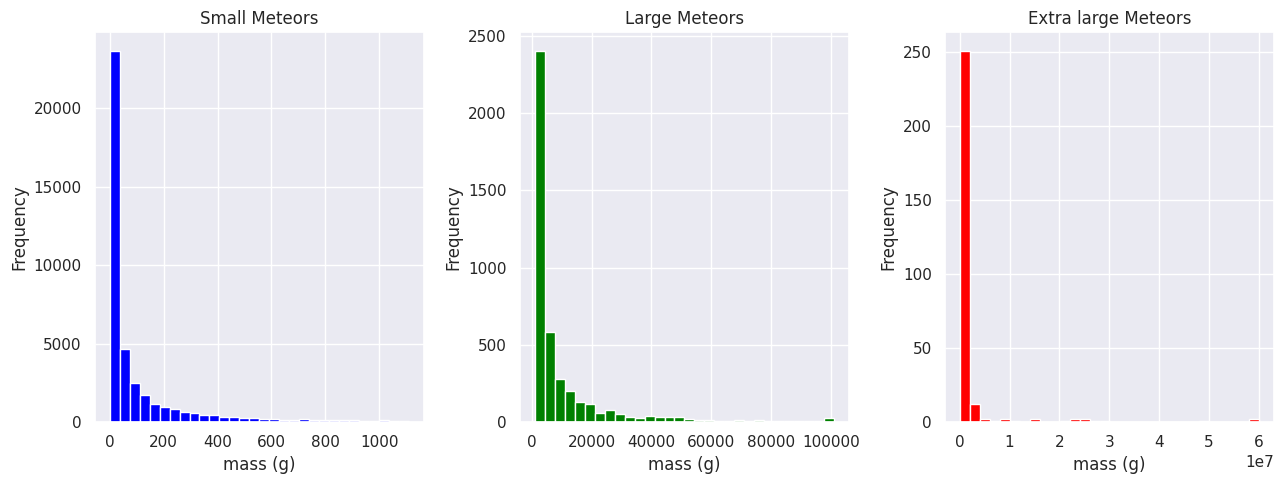

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(13,5))

small_meteors['mass (g)'].plot.hist(bins=30, color='blue', ax=axes[0])
large_meteors['mass (g)'].plot.hist(bins=30, color='green', ax=axes[1])
extra_large_meteors['mass (g)'].plot.hist(bins=30, color='red', ax=axes[2])

axes[0].title.set_text('Small Meteors')
axes[1].title.set_text('Large Meteors')
axes[2].title.set_text('Extra large Meteors')

# Nombre del eje X
axes[0].set_xlabel('mass (g)')
axes[1].set_xlabel('mass (g)')
axes[2].set_xlabel('mass (g)')

plt.tight_layout()

- Las tres distribuciones tienen alto sesgo hacia la derecha. Esto lo podemos observar en los valores de sesgo, donde se considera que valores mayores a 1 tienen alto sesgo a la derecha.
- El número de meteoritos pequeños es mayor, seguido de  meteoritos grandes y luego meteoritos extra grandes.

In [ ]:
small_meteors['mass (g)'].skew()

2.7088743921721217

In [ ]:
large_meteors['mass (g)'].skew()

3.052552976943513

In [ ]:
extra_large_meteors['mass (g)'].skew()

5.935107583896275

Otra alternativa es convertir la masa a escala logarítmica para analizar su distribución.

In [ ]:
df['Log_mass'] = np.log(df['mass (g)'])

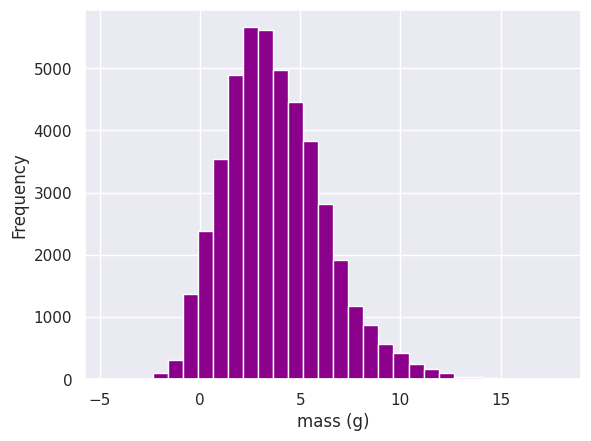

In [ ]:
df['Log_mass'].plot.hist(bins=30, color='darkmagenta')
plt.xlabel('mass (g)');

In [ ]:
df['Log_mass'].skew()

0.6539857754126619

La distribución de la masa en escala logarítmica no tiene sesgo. El sesgo es menor que 1.

### Meteoritos por año.

In [ ]:
df[df['year'] > 2023]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,Log_mass
30682,Northwest Africa 7701,57150,Valid,CK6,55.0,Found,2101.0,0.0,0.0,"(0.0, 0.0)",4.007333


En la base de datos, hay un meteorito con año 2101, se reemplazará con valores nulos al considerarlo no válido.

In [ ]:
df.loc[df['year'] > 2023, 'year'] = np.nan

In [ ]:
def tier_function(x):
  if x < 1000:
    century = 10
  elif 1000 <= x < 1100:
    century = 11
  elif 1100 <= x < 1200:
    century = 12
  elif 1200 <= x < 1300:
    century = 13
  elif 1300 <= x < 1400:
    century = 14
  elif 1400 <= x < 1500:
    century = 15
  elif 1500 <= x < 1600:
    century = 16
  elif 1600 <= x < 1700:
    century = 17
  elif 1700 <= x < 1800:
    century = 18
  elif 1800 <= x < 1900:
    century = 19
  elif 1900 <= x < 2000:
    century = 20
  else:
    century = 21
  return century

In [ ]:
df['Siglo'] = df['year'].apply(tier_function)

<Axes: xlabel='Siglo', ylabel='count'>

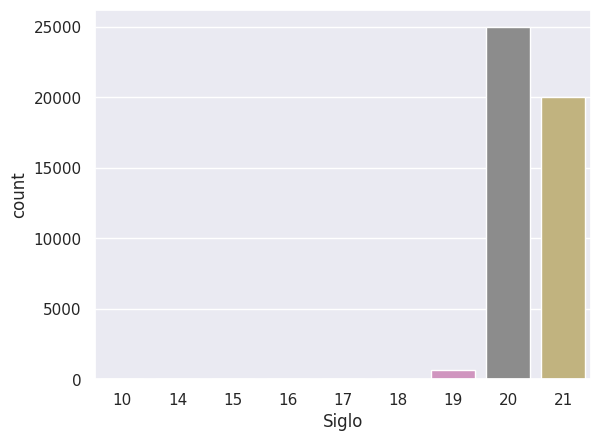

In [ ]:
sns.countplot(data=df, x='Siglo')

Los siglos 11, 12, 13 no se registraron meteoritos

### *Cuales es la clase de meteorito que cae mas frecuentemente ?*

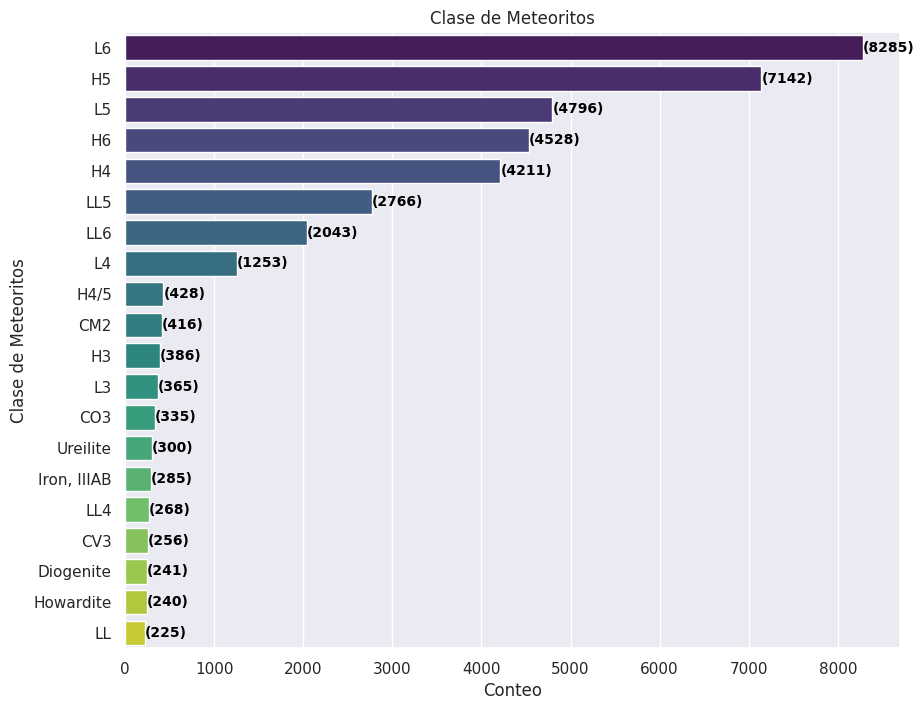

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Realiza el análisis y la visualización en Python
MeteoritesCount = df.groupby('recclass').size().reset_index(name='Count')
MeteoritesCount = MeteoritesCount.sort_values(by='Count', ascending=False).head(20)

plt.figure(figsize=(10, 8))
sns.barplot(x='Count', y='recclass', data=MeteoritesCount, palette='viridis')

for index, value in enumerate(MeteoritesCount['Count']):
    plt.text(value, index, f'({value})', ha='left', va='center', fontsize=10, color='black', fontweight='bold')

plt.title('Clase de Meteoritos')
plt.xlabel('Conteo')
plt.ylabel('Clase de Meteoritos')
plt.show()

A continuación, se muestra una imagen de un Meteorito L6 que cayó en Cotton County, Oklahoma en 1946.

<img src="https://upload.wikimedia.org/wikipedia/commons/archive/e/e8/20100521150820%21Walters_meteorite.jpg" alt="Meteorito L6" width="300" height="200">

### *¿Cuántos meteoritos Válidos y Relictos han aterrizado en la Tierra?*

Los meteoritos relictos son aquellos que han perdido masa después de aterrizar en la Tierra, debido a diversas condiciones como la erosión, la meteorización, etc. Los meteoritos válidos son los que han conservado su masa después de aterrizar en la Tierra.

In [ ]:
# Contar los valores en la columna "nametype"
conteo_nametype = df['nametype'].value_counts()

# Mostrar el resultado
print(conteo_nametype)

Valid     45641
Relict       75
Name: nametype, dtype: int64


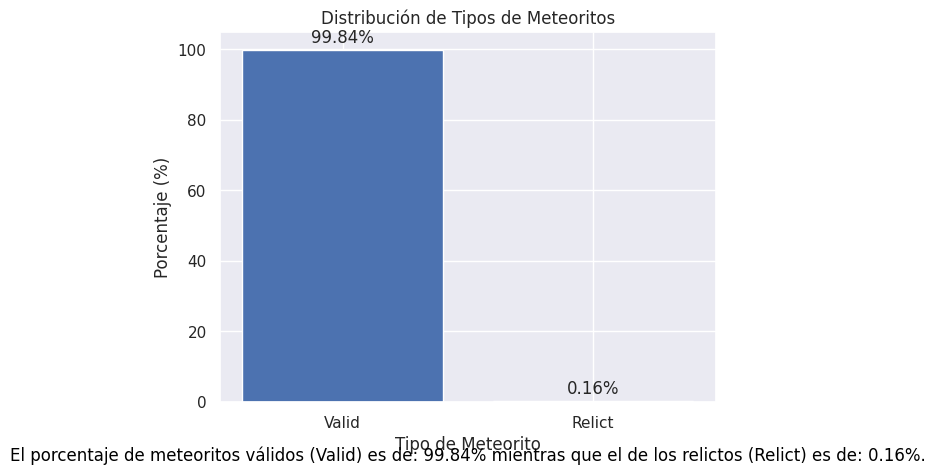

In [ ]:
# Calcular el porcentaje de cada tipo en la columna "nametype"
porcentaje_nametype = df['nametype'].value_counts(normalize=True) * 100

# Crear un gráfico de barras
plt.bar(porcentaje_nametype.index, porcentaje_nametype)

# Agregar etiquetas y título
plt.xlabel('Tipo de Meteorito')
plt.ylabel('Porcentaje (%)')
plt.title('Distribución de Tipos de Meteoritos')

# Mostrar el porcentaje en las barras
for i, value in enumerate(porcentaje_nametype):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom')

# Agregar conclusión debajo del gráfico
conclusion_text = f"El porcentaje de meteoritos válidos (Valid) es de: {porcentaje_nametype.get('Valid', 0):.2f}% mientras que el de los relictos (Relict) es de: {porcentaje_nametype.get('Relict', 0):.2f}%."
plt.text(0.5, -15, conclusion_text, ha='center', va='center', fontsize=12, color='black')

# Mostrar el gráfico
plt.show()

### *¿Cuáles fueron los meteoritos mas pesados en caer?*

In [ ]:
import pandas as pd

# Asegúrarnos que la columna "mass (g)" está en formato numérico para ordenar correctamente
df['mass (g)'] = pd.to_numeric(df['mass (g)'], errors='coerce')

# Ordenar el DataFrame por la columna "mass (g)" en orden descendente
df_sorted = df.sort_values(by='mass (g)', ascending=False)

# Seleccionar los 10 meteoritos más pesados
top_10_meteoritos = df_sorted.head(10)

# Imprimir el top 10
print(top_10_meteoritos[['name', 'mass (g)']])

                  name    mass (g)
16392             Hoba  60000000.0
5373         Cape York  58200000.0
5365   Campo del Cielo  50000000.0
5370     Canyon Diablo  30000000.0
3455           Armanty  28000000.0
12613           Gibeon  26000000.0
5468        Chupaderos  24300000.0
26297      Mundrabilla  24000000.0
920       Sikhote-Alin  23000000.0
5016        Bacubirito  22000000.0


Los 10 meteoritos más pesados son Hoba, Cape York, Campo del Cielo, etc.

Hoba, que es el meteorito más pesado que ha caído (en todo el mundo) pesaba 60 toneladas (60.000 kg) cuando cayó al suelo.
El siguiente más pesado es el Cape York, que pesaba 58 toneladas (58.200 kg) cuando cayó.
A continuación se muestra una imagen de Hoba, el meteorito más pesado del mundo:


<img src="https://upload.wikimedia.org/wikipedia/commons/a/ac/Namibie_Hoba_Meteorite_02.JPG" alt="Meteorito L6" width="600" height="400">

###  *¿Cuántos meteoritos se descubrieron inmediatamente después de chocar contra el suelo y cuántos se encontraron más tarde?*

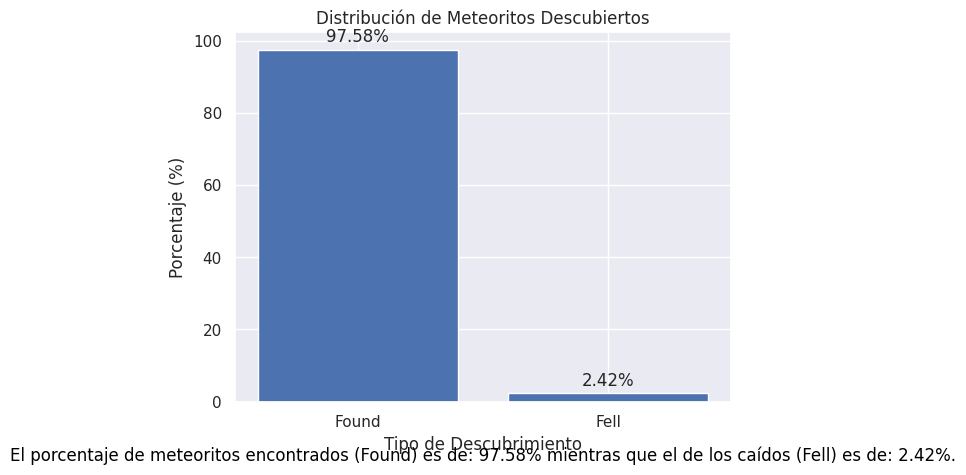

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular el porcentaje de cada tipo en la columna "fall"
porcentaje_fall = df['fall'].value_counts(normalize=True) * 100

# Crear un gráfico de barras
plt.bar(porcentaje_fall.index, porcentaje_fall)

# Agregar etiquetas y título
plt.xlabel('Tipo de Descubrimiento')
plt.ylabel('Porcentaje (%)')
plt.title('Distribución de Meteoritos Descubiertos')

# Mostrar el porcentaje en las barras
for i, value in enumerate(porcentaje_fall):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom')

# Agregar conclusión debajo del gráfico
conclusion_text = f"El porcentaje de meteoritos encontrados (Found) es de: {porcentaje_fall['Found']:.2f}% mientras que el de los caídos (Fell) es de: {porcentaje_fall['Fell']:.2f}%."
plt.text(0.5, -15, conclusion_text, ha='center', va='center', fontsize=12, color='black')

# Mostrar el gráfico
plt.show()

### *¿Cómo es la distribución geográfica de las caídas de meteoritos?*

In [ ]:
from folium.plugins import MarkerCluster

# Crear un mapa centrado en la primera ubicación de meteorito
mapa = folium.Map(location=[df_filtered['reclat'].iloc[0], df_filtered['reclong'].iloc[0]], zoom_start=2)

# Crear un grupo de marcadores
marker_cluster = MarkerCluster().add_to(mapa)

# Agregar marcadores al grupo
for index, row in df_filtered.iterrows():
    folium.Marker(location=[row['reclat'], row['reclong']], popup=row['name']).add_to(marker_cluster)

# Guardar el mapa como un archivo HTML
mapa.save('mapa_meteoritos_cluster.html')

NameError: ignored

In [ ]:
from IPython.display import IFrame

# Abrir el archivo HTML en un IFrame dentro de la celda de código
IFrame(src='mapa_meteoritos_cluster.html', width=700, height=600)

Realizamos la matriz de correlacion y graficamos.

In [ ]:
#df_corr=df[[]]

In [ ]:
def plot_corre_heatmap(corr):
    '''
    Definimos una función para ayudarnos a graficar un heatmap de correlación
    '''
    plt.figure(figsize=(6,6))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 90, fontsize=10)
    plt.yticks(rotation = 0, fontsize=10)
    # Arreglo el problema de visualización
    b, t = plt.ylim()
    b += 0.5
    t -= 0.5
    plt.ylim(b, t)
    plt.show()

In [ ]:
corr = df.corr()
plot_corre_heatmap(corr)

El grafico me indica una leve correlacion entre el id y las variables year y reclat, no esta informacion no es relevante para una analisis de correlacion

In [ ]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 3, figsize=(10, 7))
sns.boxplot(data=df, x="mass (g)", color="olive", ax=axs[0, 1])
sns.boxplot(data=df, x="reclat", color="gold", ax=axs[1, 0])
sns.boxplot(data=df, x="reclong", color="teal", ax=axs[1, 1])
sns.boxplot(data=df, x="year", color="orange", ax=axs[0, 2])

plt.show()

se puede ver segun los graficos distintos comportamientos:

massa: la media cerca del valor cero debido a los valores nulos en la recoleccion de datos

year: la media cerca del año 2000 seguramente es debido a la capacidad de recoleptar informacion, ya que en años anteriores a la tecnologia no permitia tener informacion precisa.
reclat y redlong: nos indica que hay zonas donde suele repetirse la caida de meteoritos.

In [ ]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [ ]:
geolocator = Nominatim(user_agent="test")

In [ ]:
# geolocator.reverse("50.77500,6.08333", language="en").address.split(',')[-1].strip()

In [ ]:
df['GeoLocation'] = df['GeoLocation'].str.replace('(', '', regex=False).str.replace(')', '', regex=False)

In [ ]:
def find_countries(x):
  try:
    country = geolocator.reverse(x, language="en").address.split(',')[-1].strip()
  except:
    country = 'No valid country'

  return country

In [ ]:
# df['Country'] = df['GeoLocation'].apply(find_countries)

In [ ]:
%%time

df['GeoLocation'].iloc[0:100].apply(find_countries)

CPU times: user 1.02 s, sys: 54.7 ms, total: 1.07 s
Wall time: 53.3 s


0           Germany
1           Denmark
2            Canada
3            Mexico
4         Argentina
          ...      
95          Morocco
96          Tunisia
97    United States
98     South Africa
99          Morocco
Name: GeoLocation, Length: 100, dtype: object

In [ ]:
import concurrent.futures

In [ ]:
with concurrent.futures.ThreadPoolExecutor() as executor:
    futures = []
    for url in df['GeoLocation'].iloc[0:5]:
        futures.append(executor.submit(find_countries, url))
    for future in concurrent.futures.as_completed(futures):
        print(future.result())

Germany
Canada


Denmark
No valid country
No valid country
